In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import env
from scipy import stats
from pydataset import data
import os
# filter out warnings
import warnings
warnings.filterwarnings('ignore')

# our own acquire script:
import acquire
# our own prep script:
import prepare


### 1.) Acquire, prepare & split your data.

In [2]:
iris = acquire.get_iris_data()

Using cached csv


In [3]:
iris.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [4]:
iris = prepare.prep_iris(iris)

In [5]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0


In [11]:
# Set train validate, and test samples
train_validate, test = train_test_split(iris, test_size=.2,
                                        random_state=123,
                                        stratify=iris.species)
train, validate = train_test_split(train_validate, test_size=.3,
                                   random_state=123,
                                   stratify=train_validate.species)

In [13]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
79,5.7,2.6,3.5,1.0,versicolor,1,0
36,5.5,3.5,1.3,0.2,setosa,0,0
133,6.3,2.8,5.1,1.5,virginica,0,1
95,5.7,3.0,4.2,1.2,versicolor,1,0
18,5.7,3.8,1.7,0.3,setosa,0,0


In [28]:
# Verify proportions of each
train.shape

(84, 7)

In [29]:
test.shape

(30, 7)

In [30]:
validate.shape

(36, 7)

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 79 to 73
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal_length        84 non-null     float64
 1   sepal_width         84 non-null     float64
 2   petal_length        84 non-null     float64
 3   petal_width         84 non-null     float64
 4   species             84 non-null     object 
 5   species_versicolor  84 non-null     uint8  
 6   species_virginica   84 non-null     uint8  
dtypes: float64(4), object(1), uint8(2)
memory usage: 6.2+ KB


### 2.) Univariate Stats

#### For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

In [33]:
train.sepal_length.describe()

count    84.000000
mean      5.870238
std       0.769099
min       4.400000
25%       5.375000
50%       5.800000
75%       6.400000
max       7.900000
Name: sepal_length, dtype: float64

Text(0.5, 1.0, 'Sepal Length')

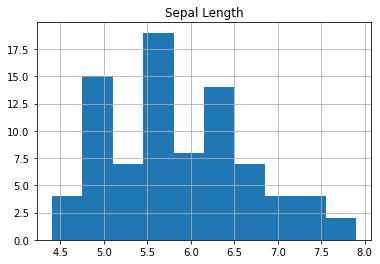

In [41]:
train.sepal_length.hist()
plt.title('Sepal Length')

Text(0.5, 1.0, 'Sepal Length')

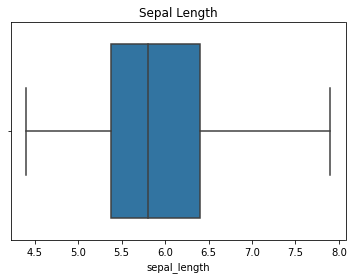

In [43]:
sns.boxplot(train.sepal_length)
plt.title('Sepal Length')

In [16]:
train.sepal_width.describe()

count    84.000000
mean      3.075000
std       0.448256
min       2.200000
25%       2.800000
50%       3.000000
75%       3.400000
max       4.400000
Name: sepal_width, dtype: float64

Text(0.5, 1.0, 'Sepal Width')

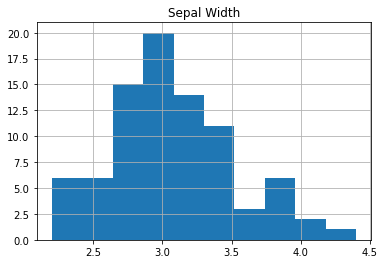

In [44]:
train.sepal_width.hist()
plt.title('Sepal Width')

Text(0.5, 1.0, 'Sepal Width')

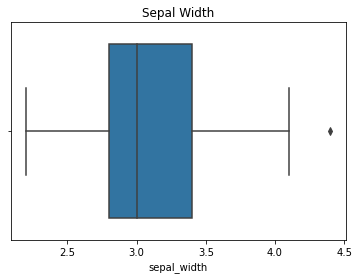

In [45]:
sns.boxplot(train.sepal_width)
plt.title('Sepal Width')

In [49]:
train.petal_length.describe()

count    84.000000
mean      3.771429
std       1.734940
min       1.200000
25%       1.600000
50%       4.250000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64

Text(0.5, 1.0, 'Petal Length')

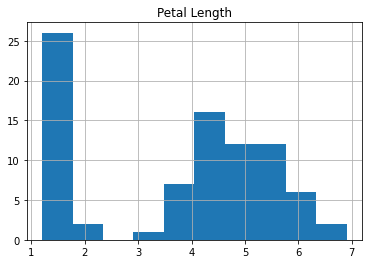

In [46]:
train.petal_length.hist()
plt.title('Petal Length')

Text(0.5, 1.0, 'Petal Length')

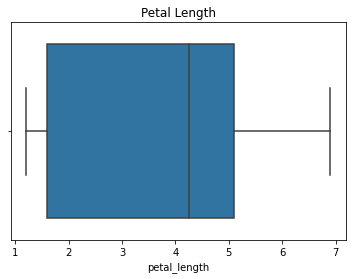

In [47]:
sns.boxplot(train.petal_length)
plt.title('Petal Length')

In [18]:
train.sepal_width.describe()

count    84.000000
mean      3.075000
std       0.448256
min       2.200000
25%       2.800000
50%       3.000000
75%       3.400000
max       4.400000
Name: sepal_width, dtype: float64

Text(0.5, 1.0, 'Petal Length')

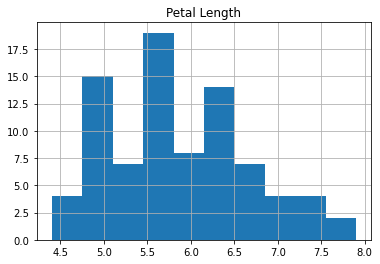

In [53]:
train.sepal_length.hist()
plt.title('Petal Length')

Text(0.5, 1.0, 'Petal Length')

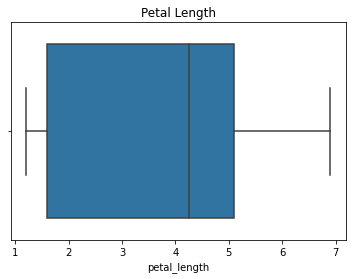

In [55]:
sns.boxplot(train.petal_length)
plt.title('Petal Length')

In [58]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
79,5.7,2.6,3.5,1.0,versicolor,1,0
36,5.5,3.5,1.3,0.2,setosa,0,0
133,6.3,2.8,5.1,1.5,virginica,0,1
95,5.7,3.0,4.2,1.2,versicolor,1,0
18,5.7,3.8,1.7,0.3,setosa,0,0


#### For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

versicolor    28
setosa        28
virginica     28
Name: species, dtype: int64


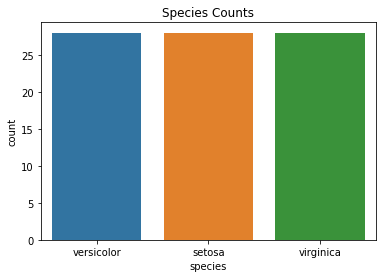

In [64]:
# Categorical column(s)
features = ('species')
# Plot using features (really only one)
sns.countplot(data=train, x = features)
plt.title('Species Counts')

print(train.species.value_counts())

#### Document takeaways & any actions.

Norm distribution for sepal width. Spikes in petal length.

### 3.) Bivariate Stats

#### Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

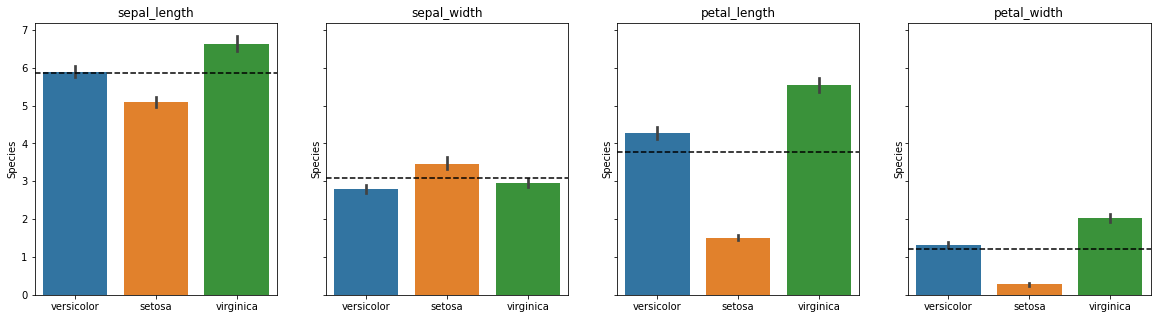

In [151]:
# Define features
features = ['sepal_length','sepal_width','petal_length','petal_width']

# Use '_' to "trash" fig. Use i for each axis
_, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 5), sharey =True)
for i, feature in enumerate(features):
    sns.barplot('species', feature, data = train, ax=ax[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Species')
    ax[i].set_title(feature)
    ax[i].axhline(train[feature].mean(), ls='--', color='black')

#### For each measurement type, compute the descriptive statistics for each species.

In [154]:
train[train.species =='versicolor'].describe()
train[train.species =='setosa'].describe()
train[train.species =='virginica'].describe()

,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
count,28.000000,28.000000,28.000000,28.000000,28.0,28.0
mean,6.625000,2.960714,5.535714,2.021429,0.0,1.0
std,0.532378,0.318956,0.496815,0.293582,0.0,0.0
min,5.800000,2.200000,4.800000,1.500000,0.0,1.0
25%,6.300000,2.800000,5.100000,1.800000,0.0,1.0
50%,6.450000,3.000000,5.500000,2.000000,0.0,1.0
75%,6.900000,3.100000,5.800000,2.300000,0.0,1.0
max,7.900000,3.800000,6.900000,2.500000,0.0,1.0


#### For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

In [153]:
versicolor = train[train.species =='versicolor']
setosa = train[train.species =='setosa']
virginica = train[train.species =='virginica']

In [158]:
t, p = stats.mannwhitneyu(virginica.petal_width, versicolor.petal_width, 
                          alternative='greater')
t,p

(48.5, 0.04608551664237896)